In [1]:
from sklearn.decomposition import PCA
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
tr = pd.read_csv('TOTAL_TRAIN.csv')

In [3]:
pca = PCA(n_components=3, random_state=42)

In [4]:
cols_color = [col for col in tr.columns if 'Q_' in col]

In [5]:
X_trn_solo_colores = tr[cols_color]

[0.8779109  0.04105958]


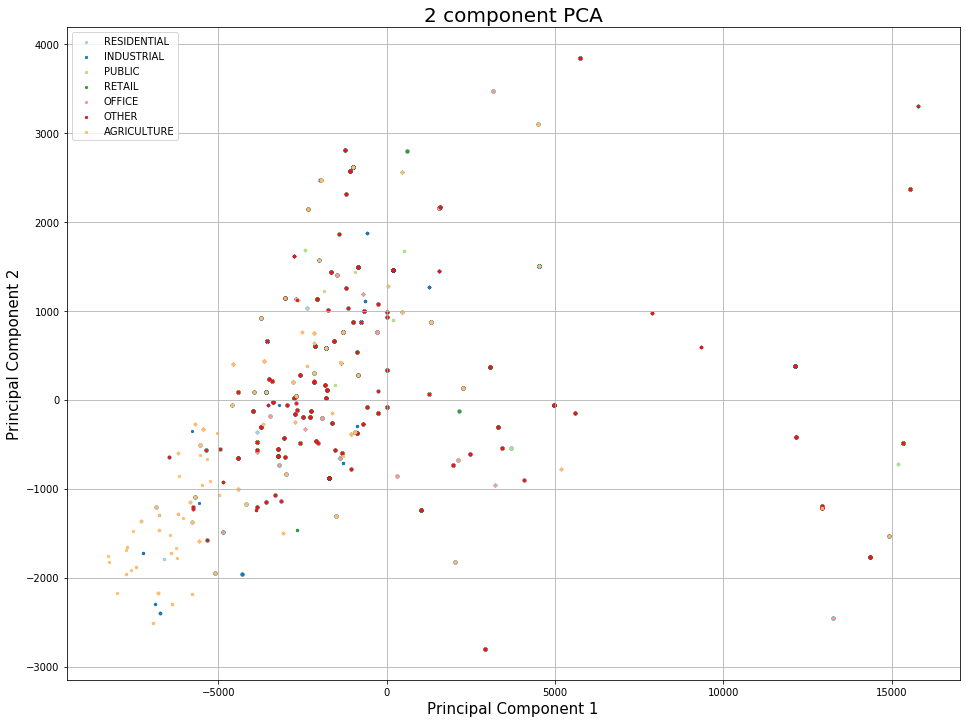

In [7]:

pca = PCA(n_components=2)
pca.fit(X_trn_solo_colores)
print(pca.explained_variance_ratio_)
pca_df = pca.transform(X_trn_solo_colores)
pca_df = pd.DataFrame({
    'x':pca_df[:,0],
    'y':pca_df[:,1],
    'target':tr.CLASE
})
fig = plt.figure(figsize = (16,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['RESIDENTIAL','INDUSTRIAL','PUBLIC','RETAIL','OFFICE','OTHER','AGRICULTURE']
colors =['#a6cee3',
'#1f78b4',
'#b2df8a',
'#33a02c',
'#fb9a99',
'#e31a1c',
'#fdbf6f']
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['target'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'x']
               , pca_df.loc[indicesToKeep, 'y']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

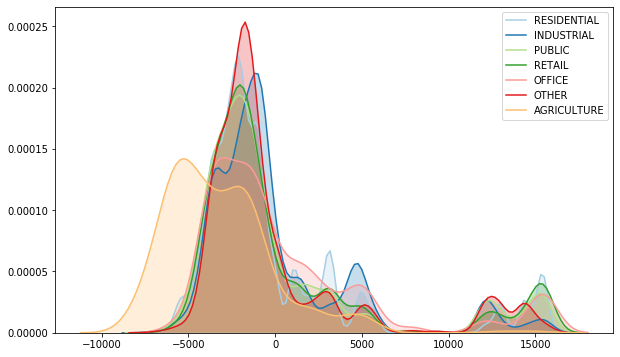

In [10]:
import seaborn as sns
 
plt.figure(figsize=(10,6))
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['target'] == target
    p1=sns.kdeplot(pca_df.loc[indicesToKeep].x, #<- Aquí cambias cuál componente plotear
                   color = color,
                   shade=True,
                   label = target)

In [8]:
a = pca.fit_transform(tr[cols_color])
geom_pca = pca.fit_transform(tr[[col for col in tr.columns if 'GEOM_' in col]])

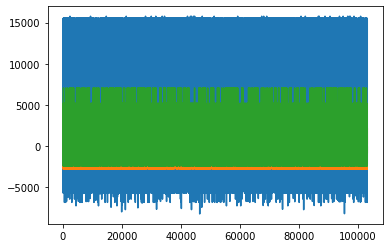

In [12]:
plt.plot(a)

In [16]:
pca.explained_variance_ratio_

array([0.8779109 , 0.04105958, 0.03167409])

In [21]:
len(a[:, 0])

103230

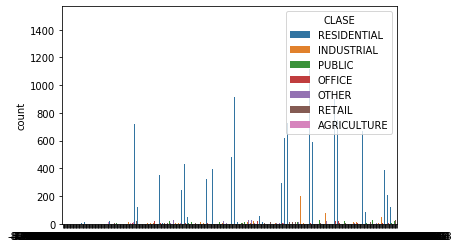

In [22]:
sns.countplot(a[:, 0], hue=tr.CLASE)

In [23]:
import numpy

def gs_cofficient(v1, v2):
    return numpy.dot(v2, v1) / numpy.dot(v1, v1)

def multiply(cofficient, v):
    return map((lambda x : x * cofficient), v)

def proj(v1, v2):
    return multiply(gs_cofficient(v1, v2) , v1)

def gs(X):
    Y = []
    for i in range(len(X)):
        temp_vec = X[i]
        for inY in Y :
            proj_vec = proj(inY, X[i])
            #print "i =", i, ", projection vector =", proj_vec
            temp_vec = map(lambda x, y : x - y, temp_vec, proj_vec)
            #print "i =", i, ", temporary vector =", temp_vec
        Y.append(temp_vec)
    return Y

In [26]:
#b = gs(tr[cols_color].values)

In [27]:
def gram_schmidt_columns(X):
    Q, R = np.linalg.qr(X)
    return Q

In [28]:
b = gram_schmidt_columns(tr[cols_color].values)

In [31]:
def gs(X, row_vecs=True, norm = True):
    if not row_vecs:
        X = X.T
    Y = X[0:1,:].copy()
    for i in range(1, X.shape[0]):
        proj = np.diag((X[i,:].dot(Y.T)/np.linalg.norm(Y,axis=1)**2).flat).dot(Y)
        Y = np.vstack((Y, X[i,:] - proj.sum(0)))
    if norm:
        Y = np.diag(1/np.linalg.norm(Y,axis=1)).dot(Y)
    if row_vecs:
        return Y
    else:
        return Y.T

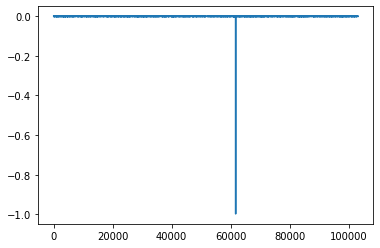

In [30]:
plt.plot(b[:, 0])

In [34]:
#c = gs(tr[cols_color].values)

In [35]:
#plt.plot(c[:, 0])

In [17]:
df = pd.DataFrame({'clase': tr.CLASE.values, 'pc1': a[:, 0], 'pc2': a[:, 1], 'pc3': a[:, 2]})

In [18]:
df.groupby('clase').mean()

,pc1,pc2,pc3
clase,,,
AGRICULTURE,-3196.588812,-219.480262,-216.805817
INDUSTRIAL,5.591372,615.043472,-311.500060
OFFICE,606.090733,153.964828,42.608588
OTHER,38.398533,127.780763,-111.388625
PUBLIC,224.312442,34.382161,30.630352
RESIDENTIAL,-18.235179,-38.411947,17.574255
RETAIL,417.118005,106.252583,-63.775652


In [19]:
df.groupby('clase').std()

,pc1,pc2,pc3
clase,,,
AGRICULTURE,3146.768836,1228.866756,662.058570
INDUSTRIAL,4249.173027,1074.790101,962.604272
OFFICE,5240.948671,1098.358516,1060.362390
OTHER,4763.815836,1086.888763,784.975514
PUBLIC,5294.118080,1034.939465,980.628675
RESIDENTIAL,5019.599959,1075.981654,949.968304
RETAIL,5465.866451,981.674062,824.052980


In [21]:
df.groupby('clase').min()

,pc1,pc2,pc3
clase,,,
AGRICULTURE,-8270.105939,-2509.482345,-2310.110505
INDUSTRIAL,-7243.324739,-2802.539250,-2418.046489
OFFICE,-5753.176484,-2802.539250,-2418.046489
OTHER,-6866.551532,-2802.539250,-2418.046489
PUBLIC,-6866.551803,-2802.539250,-2418.046489
RESIDENTIAL,-7285.467813,-2802.539250,-2418.046489
RETAIL,-6469.457982,-2802.539250,-2418.046489


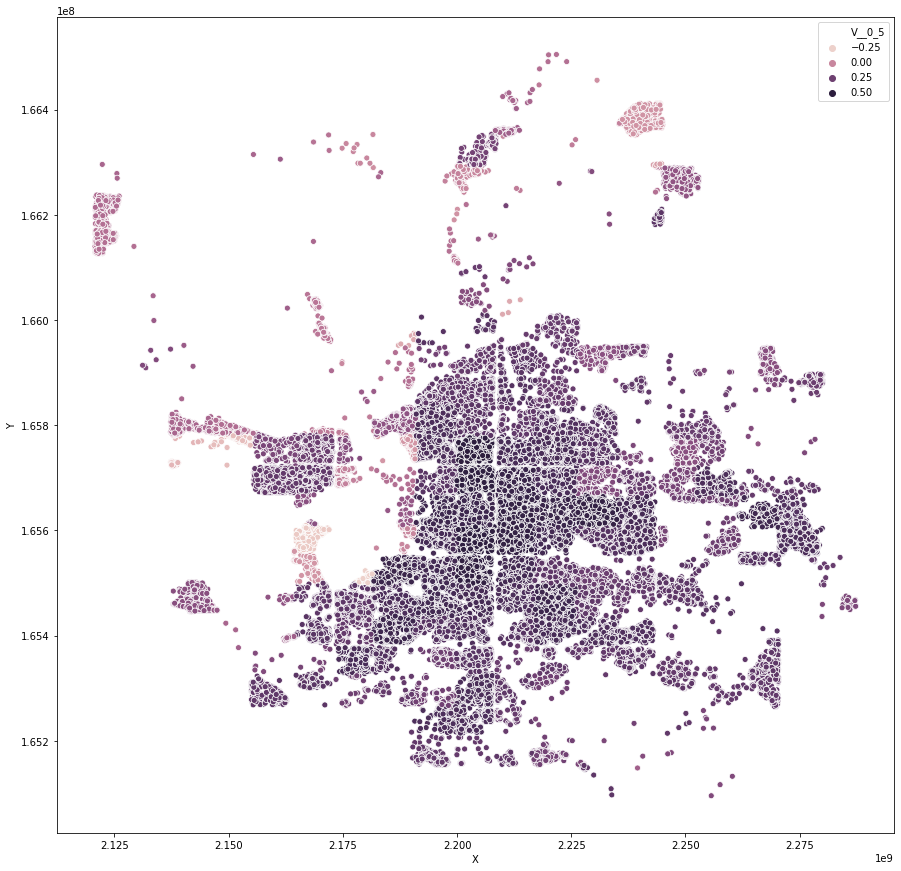

In [46]:
plt.rcParams['figure.figsize'] = (15, 15)
sns.scatterplot(tr.X, tr.Y, hue=tr2.V__0_5)

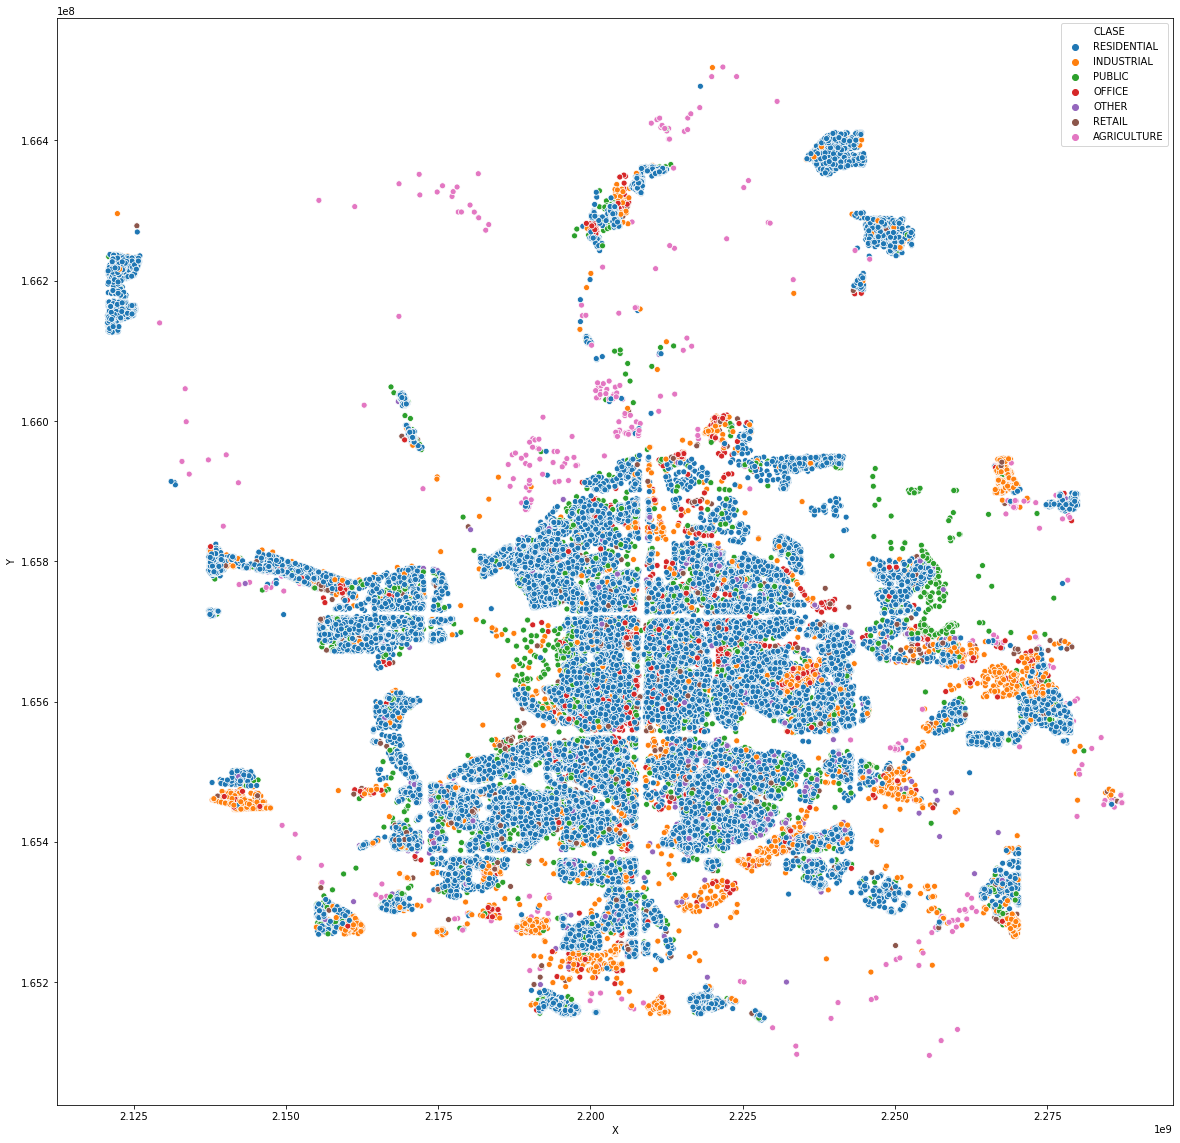

In [10]:
sns.scatterplot(tr.X, tr.Y, hue=tr.CLASE)

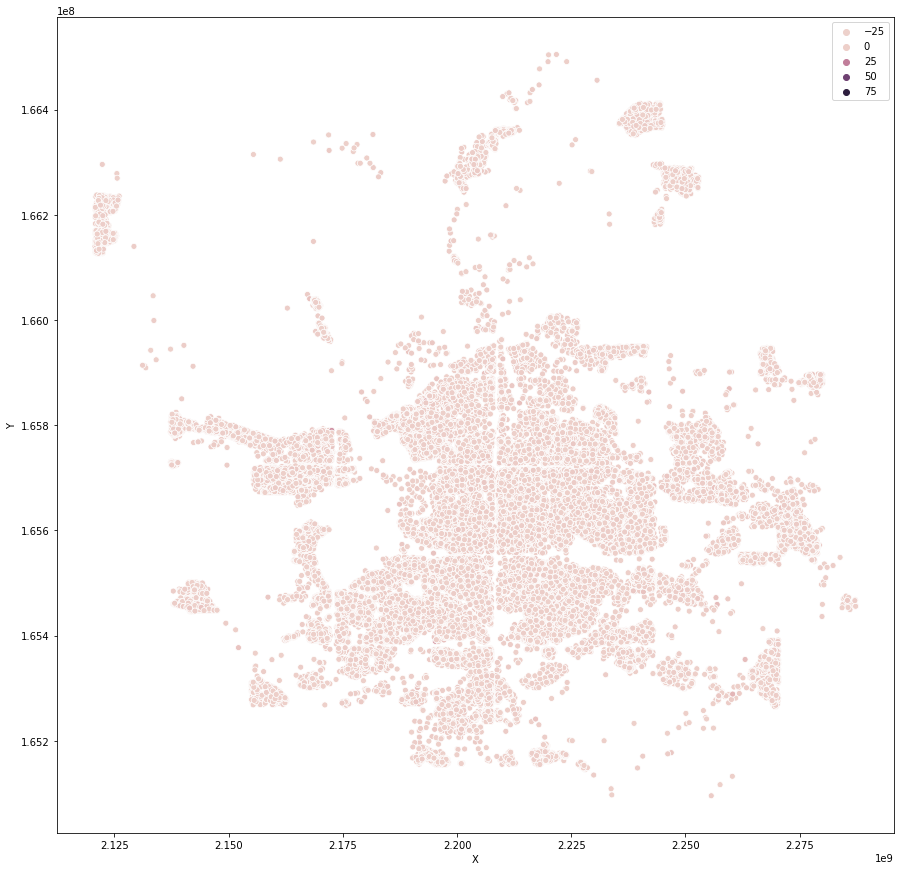

In [49]:
sns.scatterplot(tr.X, tr.Y, hue=geom_pca[:, 0])

In [53]:
geom_pca[:, 0].max()

67.7205605110239

In [54]:
df2 = pd.DataFrame({'clase': tr.CLASE, 'geom': geom_pca[:, 0]})

In [55]:
df2.groupby('clase').mean()

,geom
clase,
AGRICULTURE,0.055801
INDUSTRIAL,0.121777
OFFICE,0.017136
OTHER,0.286856
PUBLIC,0.019590
RESIDENTIAL,-0.011574
RETAIL,0.003020


In [11]:
matriz_ = np.matrix('0.299 0.587 0.114; -0.147 -0.289 0.436; 0.615 -0.515 -0.100')

In [12]:
matriz_

matrix([[ 0.299,  0.587,  0.114],
        [-0.147, -0.289,  0.436],
        [ 0.615, -0.515, -0.1  ]])

In [23]:
matriz2 = np.matrix('0.504 0.234; 0.123 0.124; 0.894 0.112')

In [24]:
np.dot(matriz_, matriz2).shape

(3, 2)

In [25]:
cols_color

['Q_R_4_0_0',
 'Q_R_4_0_1',
 'Q_R_4_0_2',
 'Q_R_4_0_3',
 'Q_R_4_0_4',
 'Q_R_4_0_5',
 'Q_R_4_0_6',
 'Q_R_4_0_7',
 'Q_R_4_0_8',
 'Q_R_4_0_9',
 'Q_R_4_1_0',
 'Q_G_3_0_0',
 'Q_G_3_0_1',
 'Q_G_3_0_2',
 'Q_G_3_0_3',
 'Q_G_3_0_4',
 'Q_G_3_0_5',
 'Q_G_3_0_6',
 'Q_G_3_0_7',
 'Q_G_3_0_8',
 'Q_G_3_0_9',
 'Q_G_3_1_0',
 'Q_B_2_0_0',
 'Q_B_2_0_1',
 'Q_B_2_0_2',
 'Q_B_2_0_3',
 'Q_B_2_0_4',
 'Q_B_2_0_5',
 'Q_B_2_0_6',
 'Q_B_2_0_7',
 'Q_B_2_0_8',
 'Q_B_2_0_9',
 'Q_B_2_1_0',
 'Q_NIR_8_0_0',
 'Q_NIR_8_0_1',
 'Q_NIR_8_0_2',
 'Q_NIR_8_0_3',
 'Q_NIR_8_0_4',
 'Q_NIR_8_0_5',
 'Q_NIR_8_0_6',
 'Q_NIR_8_0_7',
 'Q_NIR_8_0_8',
 'Q_NIR_8_0_9',
 'Q_NIR_8_1_0']

In [40]:
def get_yuv(df, matriz_=matriz_):
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler()
    qs = [f'_0_{i}' for i in range(10)] + ['_1_0']
    colors = ['Q_R_4', 'Q_G_3', 'Q_B_2']
    ys = np.empty((df.shape[0],), dtype='float64')
    us = np.empty((df.shape[0],), dtype='float64')
    vs = np.empty((df.shape[0],), dtype='float64')
    for  q in qs:
        cols_select = [f'{col}{q}' for col in colors]
        mat_col = sc.fit_transform(df[cols_select].values.T)
        yuv = np.dot(matriz_, mat_col)
        print(yuv.shape)
        df[f'Y_{q}'] = yuv[0, :].T
        df[f'U_{q}'] = yuv[1, :].T
        df[f'V_{q}'] = yuv[2, :].T
    return df

In [41]:
tr2 = get_yuv(tr)

(3, 103230)
(3, 103230)
(3, 103230)
(3, 103230)
(3, 103230)
(3, 103230)
(3, 103230)
(3, 103230)
(3, 103230)
(3, 103230)
(3, 103230)


(array([13962., 11450., 14686., 12231.,  2399.,  3469., 18287.,  7556.,
        12131.,  7059.]),
 array([0.11406542, 0.19123831, 0.2684112 , 0.3455841 , 0.42275699,
        0.49992988, 0.57710277, 0.65427567, 0.73144856, 0.80862145,
        0.88579435]),
 <a list of 10 Patch objects>)

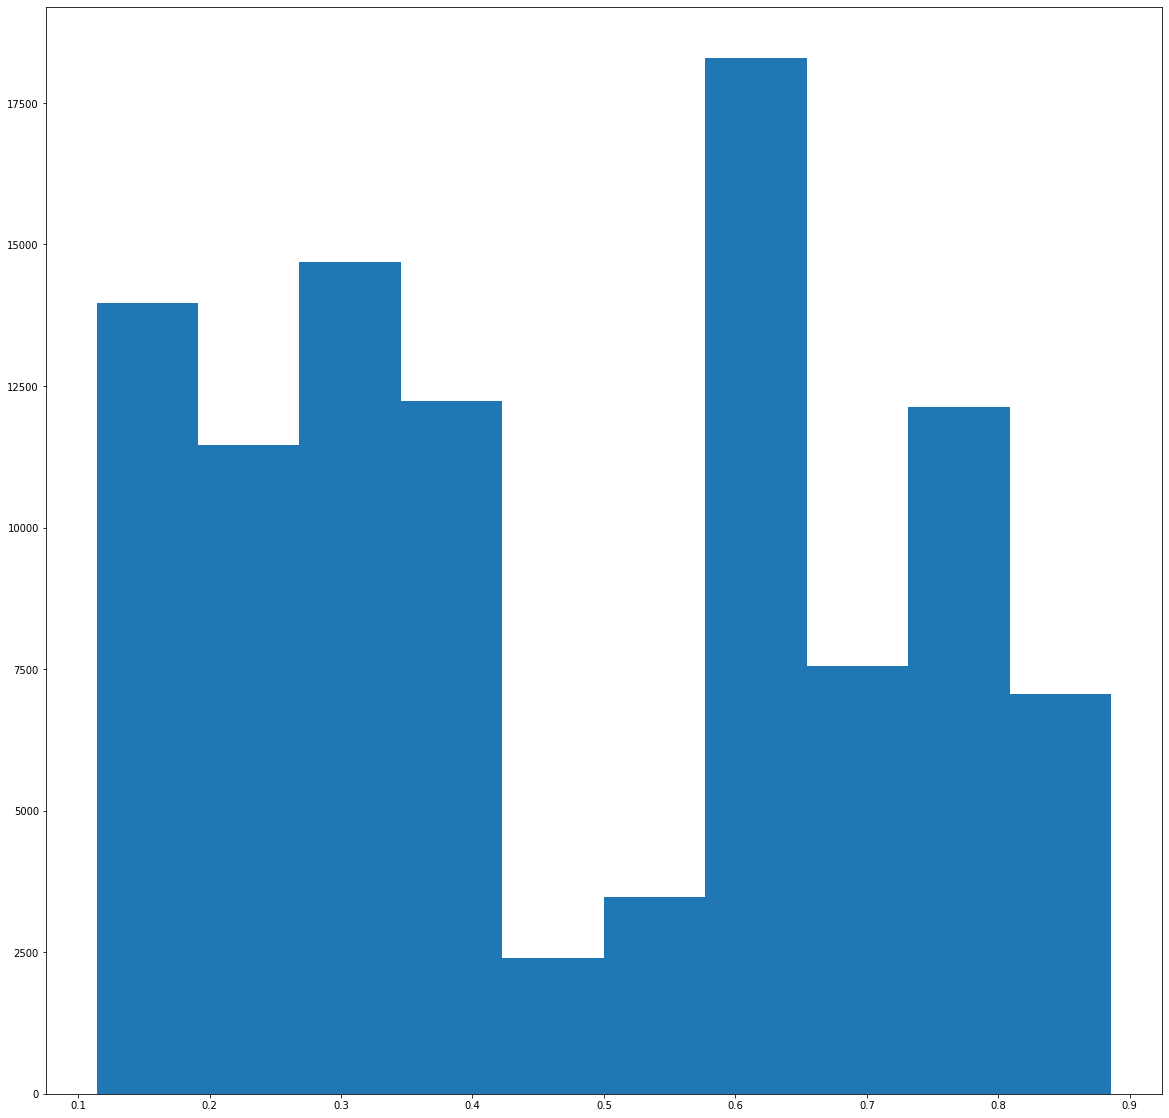

In [42]:
plt.hist(tr2.Y__0_1)